In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import statistics
import os
import sweetviz as sv
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, re
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, feature_extraction

C:\Users\Guohao\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
## alernative A
os.getcwd()
df = pd.read_csv('SGCM_car_data_with_COE_11092022v4.csv', sep=',', encoding='latin1', parse_dates=False)
df.head()

,ad_id,vehicle_type,title,make,model,variant,title_with_manufactured_year,manufactured_year,posted_date,reg_date,...,dereg_value,omv,coe,arf,engine_capacity,power,curb_weight,no_of_owners,Cat_Type,COE_of_the_month_in_2022
0,1077001,Luxury Sedan,BMW 5 Series 520i Luxury,BMW,5 Series,520i Luxury,BMW 5 Series 520i Luxury [2013],2013,26/3/22,31/3/14,...,42394.0,47529.0,82900.0,53541.0,1997.0,135.0,1615.0,4.0,Category B,110526
1,1068745,Hatchback,BMW 1 Series 116d,BMW,1 Series,116d,BMW 1 Series 116d [2015],2015,24/4/22,29/12/15,...,24671.0,23732.0,57501.0,10225.0,1496.0,85.0,1350.0,2.0,Category A,85000
2,1068742,Luxury Sedan,Bentley Continental Flying Spur 6.0A,Bentley,Continental Flying Spur,6.0A,Bentley Continental Flying Spur 6.0A [2005],2005,28/4/22,28/11/05,...,NaN,192662.0,60519.0,211929.0,5998.0,412.0,2525.0,5.0,Category B,110526
3,1030012,Luxury Sedan,Honda Accord 2.0A,Honda,Accord,2.0A,Honda Accord 2.0A [2006],2006,28/4/22,5/9/06,...,18555.0,26549.0,48479.0,29204.0,1998.0,110.0,1435.0,3.0,Category B,110526
4,1042799,SUV,Volkswagen Tiguan 2.0A TSI,Volkswagen,Tiguan,2.0A TSI,Volkswagen Tiguan 2.0A TSI [2010],2010,22/6/22,25/2/11,...,NaN,26792.0,20357.0,26792.0,1984.0,125.0,1648.0,3.0,Category B,110526


In [3]:
# ## alernative B
# os.getcwd()
# file_path = '/Users/weipengten/Desktop/CS610-Applied Machine Learning/Project/'
# try:
#     df = pd.read_csv(file_path + 'SGCM_car_data_with_COE_11092022v4.csv', sep=',')
# except UnicodeDecodeError:
#     df = pd.read_csv(file_path + 'SGCM_car_data_with_COE_11092022v4.csv', encoding='latin1')

# Basic Settings

In [4]:
# Set display options to show the full list
## pd.set_option('display.max_rows', None) ## slow down jupyter notebook
## pd.set_option('display.max_colwidth', None) ## slow down jupyter notebook
df.set_index('ad_id', inplace=True)
df.head()

,vehicle_type,title,make,model,variant,title_with_manufactured_year,manufactured_year,posted_date,reg_date,scrape_date,...,dereg_value,omv,coe,arf,engine_capacity,power,curb_weight,no_of_owners,Cat_Type,COE_of_the_month_in_2022
ad_id,,,,,,,,,,,,,,,,,,,,,
1077001,Luxury Sedan,BMW 5 Series 520i Luxury,BMW,5 Series,520i Luxury,BMW 5 Series 520i Luxury [2013],2013,26/3/22,31/3/14,11/9/22,...,42394.0,47529.0,82900.0,53541.0,1997.0,135.0,1615.0,4.0,Category B,110526
1068745,Hatchback,BMW 1 Series 116d,BMW,1 Series,116d,BMW 1 Series 116d [2015],2015,24/4/22,29/12/15,11/9/22,...,24671.0,23732.0,57501.0,10225.0,1496.0,85.0,1350.0,2.0,Category A,85000
1068742,Luxury Sedan,Bentley Continental Flying Spur 6.0A,Bentley,Continental Flying Spur,6.0A,Bentley Continental Flying Spur 6.0A [2005],2005,28/4/22,28/11/05,11/9/22,...,NaN,192662.0,60519.0,211929.0,5998.0,412.0,2525.0,5.0,Category B,110526
1030012,Luxury Sedan,Honda Accord 2.0A,Honda,Accord,2.0A,Honda Accord 2.0A [2006],2006,28/4/22,5/9/06,11/9/22,...,18555.0,26549.0,48479.0,29204.0,1998.0,110.0,1435.0,3.0,Category B,110526
1042799,SUV,Volkswagen Tiguan 2.0A TSI,Volkswagen,Tiguan,2.0A TSI,Volkswagen Tiguan 2.0A TSI [2010],2010,22/6/22,25/2/11,11/9/22,...,NaN,26792.0,20357.0,26792.0,1984.0,125.0,1648.0,3.0,Category B,110526


In [5]:
column_names = df.columns.tolist()
print(column_names)
print('    ')
print(df.describe())
print('    ')
df.info()

['vehicle_type', 'title', 'make', 'model', 'variant', 'title_with_manufactured_year', 'manufactured_year', 'posted_date', 'reg_date', 'scrape_date', 'updated_date', 'category', 'parf/coe', 'opc/non-opc', 'consignment/non-consignment', 'direct owner/dealer', 'depreciation', 'price', 'status', 'url', 'mileage', 'road_tax', 'transmission', 'dereg_value', 'omv', 'coe', 'arf', 'engine_capacity', 'power', 'curb_weight', 'no_of_owners', 'Cat_Type', 'COE_of_the_month_in_2022']
    
       manufactured_year  depreciation         price       mileage   
count       34213.000000  1.863000e+04  3.395500e+04  1.486200e+04  \
mean         2014.695320  1.949182e+04  1.144376e+05  7.259616e+04   
std             5.534407  2.857835e+04  1.261340e+05  5.278260e+04   
min          1835.000000  3.880000e+03  9.990000e+02  1.000000e+00   
25%          2011.000000  1.170000e+04  5.880000e+04  3.000000e+04   
50%          2016.000000  1.455500e+04  8.480000e+04  6.750000e+04   
75%          2018.000000  2.028

# Converting DataTypes

In [6]:
import pandas as pd
from dateutil import parser

# Improved function to handle non-string values and parse dates
def parse_dates(df, date_column, dayfirst=True):
    # Ensure all entries in the date column are strings, handling NaNs and non-string values
    df[date_column] = df[date_column].apply(lambda x: str(x) if not pd.isnull(x) else x)

    # Now attempt to parse dates, skipping over NaN values
    for index, value in df[date_column].items():
        if pd.notnull(value):
            try:
                df.at[index, date_column] = parser.parse(value, dayfirst=dayfirst)
            except ValueError:
                # Handle unparseable dates; for example, log them or set to NaN
                print(f"Skipping unparseable date: {value} at row {index}")
                df.at[index, date_column] = pd.NaT  # or use None, depending on how you want to handle these cases
    return df


In [7]:
df = parse_dates(df, 'posted_date') 
df = parse_dates(df, 'reg_date')  # for the prorsche with 1132941, it is null which was causing some error earlier
df = parse_dates(df, 'scrape_date') 
df = parse_dates(df, 'updated_date')


In [8]:
# print(df['posted_date'].dtype)
# print(df['reg_date'].dtype)
# print(df['scrape_date'].dtype)
# print(df['updated_date'].dtype)

In [9]:
# changing posted_date, reg_date, scrape_date, updated_date
df['posted_date'] = pd.to_datetime(df['posted_date'], format='%d/%m/%Y')
df['reg_date'] = pd.to_datetime(df['reg_date'], format='%d/%m/%Y')
df['scrape_date'] = pd.to_datetime(df['scrape_date'], format='%d/%m/%Y')
df['updated_date'] = pd.to_datetime(df['updated_date'], format='%d/%m/%Y')

In [10]:
# vehicle_age
df['manufactured_year'] = df['manufactured_year'].astype(int)
df['vehicle_age'] = df['posted_date'].dt.year - df['manufactured_year']
df['manufactured_year'] = df['manufactured_year'].astype(str)
 
# for all Dtype objects, change all to str type
df['vehicle_type'] = df['vehicle_type'].astype(str)
df['title'] = df['title'].astype(str)
df['make'] = df['make'].astype(str)
df['model'] = df['model'].astype(str)
df['variant'] = df['variant'].astype(str)
df['title_with_manufactured_year'] = df['title_with_manufactured_year'].astype(str)
df['transmission'] = df['transmission'].astype('str')
df['category'] = df['category'].astype(str)

# for all string types, make all lower case for consistency
df['vehicle_type'] = df['vehicle_type'].str.lower()
df['title'] = df['title'].str.lower()
df['make'] = df['make'].str.lower()
df['model'] = df['model'].str.lower()
df['variant'] = df['variant'].str.lower()

# update target variable value from '0' to 'Unknown'
df['Update-Posted Date Range'] = df['updated_date']- df['posted_date']
df['Update-Posted Date Range'] = df['Update-Posted Date Range'].replace('0', pd.NaT)

# Data Sensing (Specific Cleaning)

In [11]:
### Make
df.loc[df['make'] == "Mercedes Benz", 'make'] = "Mercedes-Benz"
df.loc[df['make'] == "Rolls-Royce", 'make'] = "Rolls-Royce"

### Engine_capacity
df['engine_capacity'] = df['engine_capacity'].replace(0, np.nan)


### Category
df['category'] = df['category'].replace('', np.nan)
# df['category'].fillna('None', inplace=True) #this has a future error, so changed the syntax to remove that as below
df['category'] = df['category'].fillna('None')

# Categorical Columns Preprocessing

In [12]:
# top make column
top_make = df['make'].value_counts().nlargest(15).index.tolist()
df.loc[df['make'].isin(top_make), 'make'] = df['make']
df.loc[~df['make'].isin(top_make), 'make'] = 'Other make'

# top manufactured_year column
top_manufactured_year = df['manufactured_year'].value_counts().nlargest(10).index.tolist()
df.loc[df['manufactured_year'].isin(top_manufactured_year), 'manufactured_year'] = df['manufactured_year']
df.loc[~df['manufactured_year'].isin(top_manufactured_year), 'manufactured_year'] = 'Other_manufactured_year'
# df['manufactured_year'].value_counts()

In [13]:
### Category

df['CAT_Almost_New_Car'] = df['category'].str.contains('Almost New Car').map({True: 'Y', False: 'N'})
df['CAT_Low_Mileage_Car'] = df['category'].str.contains('Low Mileage Car').map({True: 'Y', False: 'N'})
df['CAT_Premium_Ad_Car'] = df['category'].str.contains('Premium Ad Car').map({True: 'Y', False: 'N'})
df['CAT_Hybrid_Cars'] = df['category'].str.contains('Hybrid Cars').map({True: 'Y', False: 'N'})
df['CAT_Sgcarmart_Warranty_Cars'] = df['category'].str.contains('Sgcarmart Warranty Cars').map({True: 'Y', False: 'N'})

df['parf/coe'] = df['parf/coe'].astype(str)
df['opc/non-opc'] = df['opc/non-opc'].astype(str)
df['consignment/non-consignment'] = df['consignment/non-consignment'].astype(str)
df['direct owner/dealer'] = df['direct owner/dealer'].astype(str)

In [14]:
## creating smart binning function and treating nan value as separate category
def smart_binning(_df, _name, _tgt, bin_size):
    if _tgt in _df.columns:
        _df = _df.drop(_tgt, axis=1)
        
    ## default the type to float
    _df[_name] = df[_name].astype(float)

    ## fill nan value to -1
    _df['_tmp'] = df[_name]
    # _df['_tmp'].fillna(-1, inplace=True) #this has a future error, so changed the syntax to remove that as below
    _df['_tmp'] = _df['_tmp'].fillna(-1)
    
    ## sorting the value
    _d_df1 = _df.sort_values(by='_tmp')
    
    ## initializing bin with -1 for nan.
    _d_df1['_bin'] = np.nan
    _d_cdt = _d_df1['_tmp'] == -1
    _d_df1.loc[_d_cdt, '_bin'] = 1
    
    ## excluding -1 from percentile for bin creation
    _d_qtl = np.linspace(0, 100, bin_size + 1)[1:-1]
    
    ## excluding -1 from data for remanning bin creation
    _d_df2 = _d_df1[~_d_cdt]
    _d_pct = np.percentile(_d_df2['_tmp'], _d_qtl)
    _d_df2.loc[_d_df2.index, '_bin'] = np.searchsorted(_d_pct, _d_df2['_tmp'], side='right') + 2
    
    ## add bins to df1
    # _d_df1.update(_d_df2)
    _d_df1['_bin'] = _d_df2['_bin'].astype(int)

    
    ## mapping labels
    _d_df1_ranges = _d_df1.groupby('_bin')['_tmp'].agg(['min', 'max'])
    _d_df1_labels = _d_df1_ranges.apply(lambda x: f"{x['min']}-{x['max']}", axis=1)
    _d_df1['_tgt'] = _d_df1['_bin'].map(_d_df1_labels)
    
    ## merge back to dataframe
    _df = pd.merge(_df, _d_df1[['_tgt']], left_index=True, right_index=True, how='left')
    _df[_tgt] = _df['_tgt']

    ## drop columns
    _df = _df.drop('_tmp', axis=1)
    _df = _df.drop('_tgt', axis=1)
    
    return _df


In [15]:
df = smart_binning(df, 'depreciation', 'depreciation_bin', 19)

In [16]:
df['depreciation_bin'].value_counts()

depreciation_bin
9980.0-10620.0       994
17190.0-18440.0      985
14990.0-16060.0      985
10630.0-11230.0      983
12940.0-13530.0      983
14160.0-14980.0      982
24510.0-28870.0      982
28880.0-40630.0      981
19860.0-21910.0      981
40640.0-2260060.0    981
16070.0-17180.0      980
21920.0-24500.0      980
18450.0-19850.0      979
11240.0-11830.0      979
11840.0-12390.0      979
12400.0-12930.0      978
3880.0-8880.0        977
13540.0-14150.0      975
8890.0-9970.0        966
Name: count, dtype: int64

<AxesSubplot:>

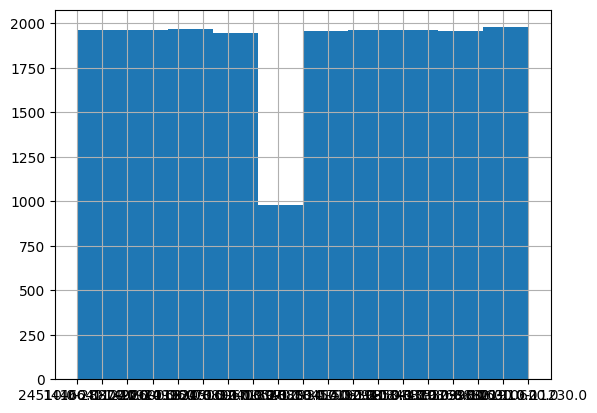

In [17]:
df['depreciation_bin'].hist()

In [18]:
df = smart_binning(df, 'price', 'price_bin', 20)
df['price_bin'].value_counts()

price_bin
33800.0-45400.0       1793
68800.0-73777.0       1790
78800.0-84778.0       1782
118800.0-132778.0     1767
90800.0-98777.0       1737
149800.0-169999.0     1727
199800.0-278800.0     1723
58800.0-63787.0       1716
98800.0-107000.0      1704
52800.0-58778.0       1703
278888.0-3588888.0    1702
999.0-19388.0         1698
84800.0-90777.0       1693
170000.0-199777.0     1676
132800.0-149777.0     1675
63800.0-68799.0       1645
107100.0-118778.0     1614
45500.0-52777.0       1609
73800.0-78787.0       1601
19400.0-33688.0       1600
Name: count, dtype: int64

<AxesSubplot:>

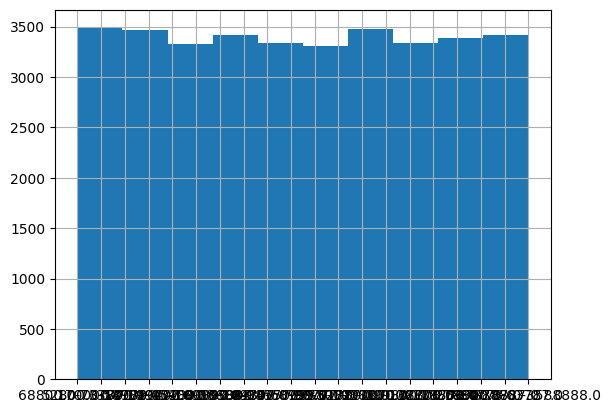

In [19]:
df['price_bin'].hist()

In [20]:
df = smart_binning(df, 'mileage', 'mileage_bin', 20)
df['mileage_bin'].value_counts()

mileage_bin
45000.0-52965.0       802
60000.0-67488.0       802
75000.0-81671.0       779
30000.0-37985.0       770
16000.0-22644.0       761
117000.0-128955.0     761
97000.0-106519.0      758
161000.0-1300000.0    749
129000.0-140454.0     749
1.0-999.0             744
89000.0-96900.0       741
140455.0-160900.0     738
1000.0-9723.0         737
9800.0-15999.0        731
81686.0-88966.0       730
106524.0-116983.0     719
67500.0-74999.0       713
22669.0-29999.0       707
53000.0-59961.0       686
38000.0-44988.0       685
Name: count, dtype: int64

In [21]:
df = smart_binning(df, 'mileage', 'mileage_bin', 20)
df['mileage_bin'].value_counts()

mileage_bin
45000.0-52965.0       802
60000.0-67488.0       802
75000.0-81671.0       779
30000.0-37985.0       770
16000.0-22644.0       761
117000.0-128955.0     761
97000.0-106519.0      758
161000.0-1300000.0    749
129000.0-140454.0     749
1.0-999.0             744
89000.0-96900.0       741
140455.0-160900.0     738
1000.0-9723.0         737
9800.0-15999.0        731
81686.0-88966.0       730
106524.0-116983.0     719
67500.0-74999.0       713
22669.0-29999.0       707
53000.0-59961.0       686
38000.0-44988.0       685
Name: count, dtype: int64

<AxesSubplot:>

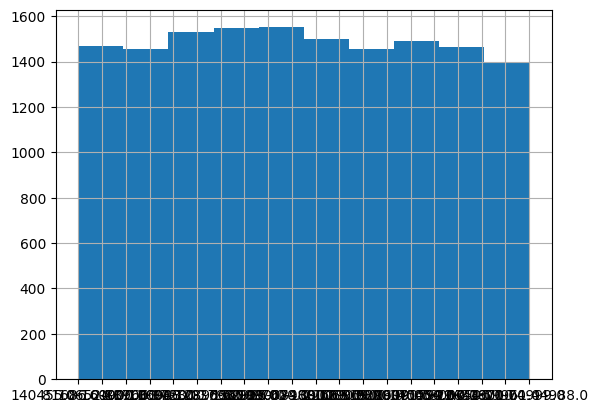

In [22]:
df['mileage_bin'].hist()

In [23]:
df = smart_binning(df, 'vehicle_age', 'vehicle_age_group', 15)
df['vehicle_age_group'].value_counts()

vehicle_age_group
14.0-187.0    4476
6.0-6.0       3707
4.0-4.0       3529
3.0-3.0       3388
5.0-5.0       3180
7.0-7.0       2735
8.0-9.0       2690
1.0-1.0       2315
10.0-11.0     2192
13.0-13.0     1949
2.0-2.0       1937
12.0-12.0     1488
0.0-0.0        627
Name: count, dtype: int64

<AxesSubplot:>

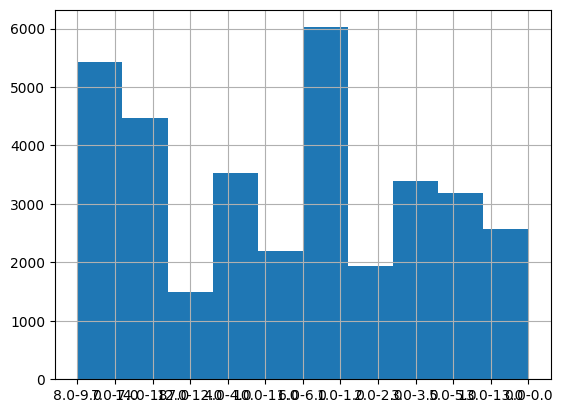

In [24]:
df['vehicle_age_group'].hist()

In [25]:
# IsContinental (1 or 0)

### filter out certain makes from the dataframe
df = df[~df['make'].isin(['Hummer', 'Pontiac', 'Tesla'])]
### create a list of Asian makes
asian = ["BYD", "Chery Fulwin", "Daihatsu", "Datsun", "Honda", "Hyundai", "Infiniti", "Kia", "Lexus", "Mazda", "Mitsubishi", "Mitsuoka", "Nissan", "Perodua", "Proton", "Sinotruk", "Suzuki", "Toyota"]
asian_lower = [item.lower() for item in asian]
### iterate through each row in the dataframe and check if the make is in the asian list
for i, row in df.iterrows():
    if row['make'] in asian_lower:
        df.at[i, 'Continental'] = '0'
    else:
        df.at[i, 'Continental'] = '1'

In [26]:
# Define a function to determine the COE category
def get_coe_category(row):
    if row['CAT_Electric'] == 0:
        if row['engine_capacity'] <= 1600 and row['power'] <= 97:
            return 'Category A'
        else:
            return 'Category B'
    elif row['CAT_Electric'] == 1:
        if row['power'] <= 97:
            return 'Category A'
        else:
            return 'Category B'
    else:
        return 'Unknown'
    
    
def createlabelforbin(listx):
    l = len(listx)
    labels = []
    if l >= 3:
        labels.append(f'0.Below {listx[1]}')
        for i in range(1,l-2):
            labels.append(f"{i}.{listx[i]+1} - {listx[i+1]}")
        labels.append(f"{l-2}.Above {listx[l-2]+1}")
    return labels
    
def printna0(df,col):
    print(f"na : {len(df[df[col].isna()])}")
    print(f"0 : {len(df[df[col]==0])}")   
    
    
def keeptopn(df,col,n):
    print(f"before consolidation")
    print(df[col].value_counts())
    top = df[col].value_counts().nlargest(n).index.tolist()
    df.loc[df[col].isin(top),col] = df[col]
    df.loc[~df[col].isin(top),col] = f"other_{col}"
    print()
    print(f"after consolidation")
    print(df[col].value_counts())
    
    
def extract_from_category(df,col,str):
    df[f'CAT_{str}'] = df[col].str.contains(str).map({True: 1 , False: 0}).astype('category')
    

## Electric
extract_from_category(df,'category','Electric')

# Apply the function to each row in the DataFrame
df['COE_Category'] = df.apply(get_coe_category, axis=1)

# RoadTax Bins
bins = [0, 500, 600, 700, 800, 900, 1000, 1250, 1500, 2000, 3000, np.inf]
df['road_tax_bin'] = pd.cut(df['road_tax'], bins=bins, labels=createlabelforbin(bins))
df['road_tax_bin'].value_counts()

# smaller OMV Bins (based on ARF banding)
bins = [0, 20000, 30000, 40000, 60000, 80000, np.inf]
df['omv_smallbin'] = pd.cut(df['omv'], bins=bins, labels=createlabelforbin(bins))
df['omv_smallbin'].value_counts()

# engine Bins
bins = [0, 1300, 1400, 1500, 1600, 1800, 2000, 2500, 3000, np.inf]
df['engine_capacity_bin'] = pd.cut(df['engine_capacity'], bins=bins, labels=createlabelforbin(bins))
df['engine_capacity_bin'].value_counts()

# power Bins
bins = [0, 75, 80, 85, 90, 95, 100, 130, 160, 200, 250, 300, np.inf]
df['power_bin'] = pd.cut(df['power'], bins=bins, labels=createlabelforbin(bins))
df['power_bin'].value_counts()

power_bin
6.101 - 130     6953
7.131 - 160     4261
3.86 - 90       2857
5.96 - 100      2694
8.161 - 200     2392
4.91 - 95       1899
0.Below 75      1872
9.201 - 250     1695
2.81 - 85       1690
1.76 - 80       1688
11.Above 301    1384
10.251 - 300     666
Name: count, dtype: int64

In [27]:
# analyze_report = sv.analyze(df)
# analyze_report.show_notebook()

# Feature Engineering (WP)

### Pre-requsites

In [28]:
# columns_to_check = ['posted_date', 'reg_date','updated_date']
# df_eda=df[columns_to_check]
# analyze_report = sv.analyze(df_eda)
# analyze_report.show_notebook()

In [29]:
# Deriving our target column: Time_taken_to_sell_classficationtype_test_3
df['Time_taken_to_sell_days']=df['updated_date']-df['posted_date']
df['Time_taken_to_sell_months'] = (df['updated_date'] - df['posted_date']).dt.days / 30
df['Time_taken_to_sell_weeks'] = (df['updated_date'] - df['posted_date']).dt.days / 7
df['Time_taken_to_sell_classficationtype_test_3'] = np.where(df['Time_taken_to_sell_weeks'] < 1 & (df['status'] == "SOLD"), 'Sold in Less Than One Week',
                                                        np.where((df['Time_taken_to_sell_weeks'] >= 1) & (df['Time_taken_to_sell_weeks'] < 3)& (df['status'] == "SOLD"),'Sold in Less Than Three Weeks',        
                                                                'Not sold within Three Weeks'))
# # Deriving our vehicle age:
# # df['Vehicle_Age'] = df['posted_date'].dt.year - df['manufactured_year']

# # Deriving our vehicle age:
# df['Vehicle_Age'] = df['posted_date'].dt.year - df['reg_date'].dt.year

# # AgeGroup Bins
# df['age_group'] = np.where((df['Vehicle_Age'] <= 5), 'Low',
#                                    np.where((df['Vehicle_Age'] <= 10), 'Medium', 'High'))

# # Price Bins
# bins = [0, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 60000, 70000, 80000, 100000, 120000, 140000, 160000, 180000, 200000, np.inf]
# labels = ['Below 10000', '10001 to 15000', '15001 to 20000', '20001 to 25000', '25001 to 30000', '30001 to 35000', '35001 to 40000', '40001 to 45000', '45001 to 50000', '50001 to 60000', '60001 to 70000', '70001 to 80000', '80001 to 100000', '100001 to 120000', '120001 to 140000', '140001 to 160000', '160001 to 180000', '180001 to 200000', 'Above 200000']
# df['Price_bins'] = pd.cut(df['price'], bins=bins, labels=labels)

# # Depreciation Bins
# bins = [0, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 16000, 18000, 20000, 25000, np.inf]
# labels = ['Below 7000/yr', 'Below 8000/yr', 'Below 9000/yr', 'Below 10000/yr', '10000 to 11000/yr',  '11000 to 12000/yr','12000 to 13000/yr','13000 to 14000/yr', '14000 to 16000/yr', '16000 to 18000/yr', '18000 to 20000/yr', '20000 to 25000/yr','Above 25000/yr']
# df['Depreciation_bins'] = pd.cut(df['depreciation'], bins=bins, labels=labels)

# # HighMileage (1 or 0)
# df = df.assign(high_mileage=lambda x: x['mileage'].gt(100000).astype(int))

# # SingleOwner (1 or 0)
# df = df.assign(single_owners=lambda x: x['no_of_owners'].eq(1).astype(int))

# CoeCategory (A or B)
df['coe_category'] = np.where((df['engine_capacity'] <= 1600), 'A',
                              np.where((df['engine_capacity'] > 1600) | (df['power'] > 97), 'B', None))

# # IsContinental (1 or 0)

# ### filter out certain makes from the dataframe
# df = df[~df['make'].isin(['Hummer', 'Pontiac', 'Tesla'])]
# ### create a list of Asian makes
# asian = ["BYD", "Chery Fulwin", "Daihatsu", "Datsun", "Honda", "Hyundai", "Infiniti", "Kia", "Lexus", "Mazda", "Mitsubishi", "Mitsuoka", "Nissan", "Perodua", "Proton", "Sinotruk", "Suzuki", "Toyota"]
# ### iterate through each row in the dataframe and check if the make is in the asian list
# for i, row in df.iterrows():
#     if row['make'] in asian:
#         df.at[i, 'Continental'] = 0
#     else:
#         df.at[i, 'Continental'] = 1
        
# column_names = df.columns.tolist()
# print(column_names)


In [30]:
# columns_to_check = ['Time_taken_to_sell_classficationtype_test_3']
# df_eda=df[columns_to_check]
# analyze_report = sv.analyze(df_eda)
# analyze_report.show_notebook()

## Distributions for Test Cases
- Time_taken_to_sell_classficationtype_test_1: Classifies the time taken to sell into three categories based on the number of weeks it took to sell.
- Time_taken_to_sell_classficationtype_test_2: Classifies the time taken to sell into three categories based on the number of weeks it took to sell and whether the vehicle was sold or not.
- Time_taken_to_sell_classficationtype_test_3: Classifies the time taken to sell into three categories based on the number of weeks it took to sell and whether the vehicle was sold within 3 weeks or not.
- Time_taken_to_sell_classficationtype_test_4: Classifies the time taken to sell into four categories based on the number of weeks it took to sell and whether the vehicle was sold within 1 week, 3 weeks, or 10 weeks.
- Time_taken_to_sell_classficationtype_test_5: Classifies the time taken to sell into four categories based on the number of weeks it took to sell and whether the vehicle was sold within 1 week, 3 weeks, or 30 weeks

In [31]:
df['Time_taken_to_sell_classficationtype_test_1'] = np.where(df['Time_taken_to_sell_weeks'] < 1, 'Sold in Less Than One Week',
                                                        np.where((df['Time_taken_to_sell_weeks'] >= 1) & (df['Time_taken_to_sell_weeks'] < 2),'Sold in Less Than Two Weeks',        
                                                                'Not sold within Two Weeks'))

In [32]:
df['Time_taken_to_sell_classficationtype_test_2'] = np.where(df['Time_taken_to_sell_weeks'] < 1 & (df['status'] == "SOLD"), 'Sold in Less Than One Week',
                                                        np.where((df['Time_taken_to_sell_weeks'] >= 1) & (df['Time_taken_to_sell_weeks'] < 2)& (df['status'] == "SOLD"),'Sold in Less Than Two Weeks',        
                                                                'Not sold within Two Weeks'))

In [33]:
df['Time_taken_to_sell_classficationtype_test_3'] = np.where(df['Time_taken_to_sell_weeks'] < 1 & (df['status'] == "SOLD"), 'Sold in Less Than One Week',
                                                        np.where((df['Time_taken_to_sell_weeks'] >= 1) & (df['Time_taken_to_sell_weeks'] < 3)& (df['status'] == "SOLD"),'Sold in Less Than Three Weeks',        
                                                                'Not sold within Three Weeks'))

In [34]:
df['Time_taken_to_sell_classficationtype_test_4'] = np.where((df['Time_taken_to_sell_weeks'] < 1) & (df['status'] == "SOLD"), 'Sold in Less Than One Week',
                                                        np.where(((df['Time_taken_to_sell_weeks'] >= 1) & (df['Time_taken_to_sell_weeks'] < 3)) & (df['status'] == "SOLD"),'Sold in Less Than Three Weeks',
                                                                np.where(((df['Time_taken_to_sell_weeks'] >= 3) & (df['Time_taken_to_sell_weeks'] < 10)) & (df['status'] == "SOLD"),'Sold in Less Than Ten Weeks',
                                                                         'Not sold within Ten Weeks')))



In [35]:
df['Time_taken_to_sell_classficationtype_test_5'] = np.where((df['Time_taken_to_sell_weeks'] < 1) & (df['status'] == "SOLD"), 'Sold in Less Than One Week',
                                                        np.where(((df['Time_taken_to_sell_weeks'] >= 1) & (df['Time_taken_to_sell_weeks'] < 3)) & (df['status'] == "SOLD"),'Sold in Less Than Three Weeks',
                                                                np.where(((df['Time_taken_to_sell_weeks'] >= 3) & (df['Time_taken_to_sell_weeks'] < 30)) & (df['status'] == "SOLD"),'Sold in Less Than Thirtry Weeks',
                                                                         'Not sold within Thirty Weeks')))



In [36]:
# columns_to_check = ['Time_taken_to_sell_classficationtype_test_1', 'Time_taken_to_sell_classficationtype_test_2', 'Time_taken_to_sell_classficationtype_test_3','Time_taken_to_sell_classficationtype_test_4','Time_taken_to_sell_classficationtype_test_5']
# df_eda=df[columns_to_check]
# analyze_report = sv.analyze(df_eda)
# analyze_report.show_notebook()

In [37]:
column_names = df.columns.tolist()
print(column_names)

['vehicle_type', 'title', 'make', 'model', 'variant', 'title_with_manufactured_year', 'manufactured_year', 'posted_date', 'reg_date', 'scrape_date', 'updated_date', 'category', 'parf/coe', 'opc/non-opc', 'consignment/non-consignment', 'direct owner/dealer', 'depreciation', 'price', 'status', 'url', 'mileage', 'road_tax', 'transmission', 'dereg_value', 'omv', 'coe', 'arf', 'engine_capacity', 'power', 'curb_weight', 'no_of_owners', 'Cat_Type', 'COE_of_the_month_in_2022', 'vehicle_age', 'Update-Posted Date Range', 'CAT_Almost_New_Car', 'CAT_Low_Mileage_Car', 'CAT_Premium_Ad_Car', 'CAT_Hybrid_Cars', 'CAT_Sgcarmart_Warranty_Cars', 'depreciation_bin', 'price_bin', 'mileage_bin', 'vehicle_age_group', 'Continental', 'CAT_Electric', 'COE_Category', 'road_tax_bin', 'omv_smallbin', 'engine_capacity_bin', 'power_bin', 'Time_taken_to_sell_days', 'Time_taken_to_sell_months', 'Time_taken_to_sell_weeks', 'Time_taken_to_sell_classficationtype_test_3', 'coe_category', 'Time_taken_to_sell_classficationty

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34213 entries, 1077001 to 1089661
Data columns (total 60 columns):
 #   Column                                       Non-Null Count  Dtype          
---  ------                                       --------------  -----          
 0   vehicle_type                                 34213 non-null  object         
 1   title                                        34213 non-null  object         
 2   make                                         34213 non-null  object         
 3   model                                        34213 non-null  object         
 4   variant                                      34213 non-null  object         
 5   title_with_manufactured_year                 34213 non-null  object         
 6   manufactured_year                            34213 non-null  object         
 7   posted_date                                  34213 non-null  datetime64[ns] 
 8   reg_date                                     34212 non-null  da

In [39]:
columns_to_check = ['vehicle_age', 'Time_taken_to_sell_weeks', 'no_of_owners','curb_weight',
                    'engine_capacity','power','arf','coe','omv','dereg_value','road_tax','mileage','depreciation','price']

df_eda=df[columns_to_check]
#we need this to drop all the infinity and -infinity and nan otherwise VIF doesnt work
df_eda = df_eda.replace([np.inf,-np.inf],np.nan).dropna()


def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['tolerance'] = 1/vif.VIF
    vif['meanVIF'] = vif.VIF.mean()

    return(vif)

calc_vif(df_eda.select_dtypes(include=['int64','float64']))

,variables,VIF,tolerance,meanVIF
0,vehicle_age,14.212000,0.070363,39.54218
1,Time_taken_to_sell_weeks,1.366317,0.731894,39.54218
2,no_of_owners,7.280586,0.137352,39.54218
3,curb_weight,49.479962,0.020210,39.54218
4,engine_capacity,138.841917,0.007202,39.54218
5,power,28.988042,0.034497,39.54218
6,arf,106.957991,0.009349,39.54218
7,coe,15.020515,0.066576,39.54218
8,omv,81.491395,0.012271,39.54218
9,dereg_value,47.841317,0.020902,39.54218


In [40]:
df

,vehicle_type,title,make,model,variant,title_with_manufactured_year,manufactured_year,posted_date,reg_date,scrape_date,...,power_bin,Time_taken_to_sell_days,Time_taken_to_sell_months,Time_taken_to_sell_weeks,Time_taken_to_sell_classficationtype_test_3,coe_category,Time_taken_to_sell_classficationtype_test_1,Time_taken_to_sell_classficationtype_test_2,Time_taken_to_sell_classficationtype_test_4,Time_taken_to_sell_classficationtype_test_5
ad_id,,,,,,,,,,,,,,,,,,,,,
1077001,luxury sedan,bmw 5 series 520i luxury,bmw,5 series,520i luxury,BMW 5 Series 520i Luxury [2013],Other_manufactured_year,2022-03-26,2014-03-31,2022-09-11,...,7.131 - 160,165 days,5.500000,23.571429,Not sold within Three Weeks,B,Not sold within Two Weeks,Not sold within Two Weeks,Not sold within Ten Weeks,Not sold within Thirty Weeks
1068745,hatchback,bmw 1 series 116d,bmw,1 series,116d,BMW 1 Series 116d [2015],2015,2022-04-24,2015-12-29,2022-09-11,...,2.81 - 85,131 days,4.366667,18.714286,Not sold within Three Weeks,A,Not sold within Two Weeks,Not sold within Two Weeks,Not sold within Ten Weeks,Not sold within Thirty Weeks
1068742,luxury sedan,bentley continental flying spur 6.0a,Other make,continental flying spur,6.0a,Bentley Continental Flying Spur 6.0A [2005],Other_manufactured_year,2022-04-28,2005-11-28,2022-09-11,...,11.Above 301,127 days,4.233333,18.142857,Not sold within Three Weeks,B,Not sold within Two Weeks,Not sold within Two Weeks,Not sold within Ten Weeks,Not sold within Thirty Weeks
1030012,luxury sedan,honda accord 2.0a,honda,accord,2.0a,Honda Accord 2.0A [2006],Other_manufactured_year,2022-04-28,2006-09-05,2022-09-11,...,6.101 - 130,127 days,4.233333,18.142857,Not sold within Three Weeks,B,Not sold within Two Weeks,Not sold within Two Weeks,Not sold within Ten Weeks,Not sold within Thirty Weeks
1042799,suv,volkswagen tiguan 2.0a tsi,volkswagen,tiguan,2.0a tsi,Volkswagen Tiguan 2.0A TSI [2010],Other_manufactured_year,2022-06-22,2011-02-25,2022-09-11,...,6.101 - 130,77 days,2.566667,11.000000,Not sold within Three Weeks,B,Not sold within Two Weeks,Not sold within Two Weeks,Not sold within Ten Weeks,Sold in Less Than Thirtry Weeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085074,hatchback,mercedes-benz b-class b180 style,mercedes-benz,b-class,b180 style,Mercedes-Benz B-Class B180 Style [2015],2015,2022-06-19,2015-04-22,2022-09-11,...,3.86 - 90,0 days,0.000000,0.000000,Sold in Less Than One Week,A,Sold in Less Than One Week,Sold in Less Than One Week,Sold in Less Than One Week,Sold in Less Than One Week
1108708,suv,nissan qashqai 1.2a dig-t,nissan,qashqai,1.2a dig-t,Nissan Qashqai 1.2A DIG-T [2017],2017,2022-06-19,2017-06-27,2022-09-11,...,2.81 - 85,0 days,0.000000,0.000000,Sold in Less Than One Week,A,Sold in Less Than One Week,Sold in Less Than One Week,Sold in Less Than One Week,Sold in Less Than One Week
1089915,suv,nissan x-trail 2.0a premium 7-seater sunroof,nissan,x-trail,2.0a premium 7-seater sunroof,Nissan X-Trail 2.0A Premium 7-Seater Sunroof [...,2020,2022-06-19,2020-03-31,2022-09-11,...,6.101 - 130,0 days,0.000000,0.000000,Sold in Less Than One Week,B,Sold in Less Than One Week,Sold in Less Than One Week,Sold in Less Than One Week,Sold in Less Than One Week


In [41]:
df

,vehicle_type,title,make,model,variant,title_with_manufactured_year,manufactured_year,posted_date,reg_date,scrape_date,...,power_bin,Time_taken_to_sell_days,Time_taken_to_sell_months,Time_taken_to_sell_weeks,Time_taken_to_sell_classficationtype_test_3,coe_category,Time_taken_to_sell_classficationtype_test_1,Time_taken_to_sell_classficationtype_test_2,Time_taken_to_sell_classficationtype_test_4,Time_taken_to_sell_classficationtype_test_5
ad_id,,,,,,,,,,,,,,,,,,,,,
1077001,luxury sedan,bmw 5 series 520i luxury,bmw,5 series,520i luxury,BMW 5 Series 520i Luxury [2013],Other_manufactured_year,2022-03-26,2014-03-31,2022-09-11,...,7.131 - 160,165 days,5.500000,23.571429,Not sold within Three Weeks,B,Not sold within Two Weeks,Not sold within Two Weeks,Not sold within Ten Weeks,Not sold within Thirty Weeks
1068745,hatchback,bmw 1 series 116d,bmw,1 series,116d,BMW 1 Series 116d [2015],2015,2022-04-24,2015-12-29,2022-09-11,...,2.81 - 85,131 days,4.366667,18.714286,Not sold within Three Weeks,A,Not sold within Two Weeks,Not sold within Two Weeks,Not sold within Ten Weeks,Not sold within Thirty Weeks
1068742,luxury sedan,bentley continental flying spur 6.0a,Other make,continental flying spur,6.0a,Bentley Continental Flying Spur 6.0A [2005],Other_manufactured_year,2022-04-28,2005-11-28,2022-09-11,...,11.Above 301,127 days,4.233333,18.142857,Not sold within Three Weeks,B,Not sold within Two Weeks,Not sold within Two Weeks,Not sold within Ten Weeks,Not sold within Thirty Weeks
1030012,luxury sedan,honda accord 2.0a,honda,accord,2.0a,Honda Accord 2.0A [2006],Other_manufactured_year,2022-04-28,2006-09-05,2022-09-11,...,6.101 - 130,127 days,4.233333,18.142857,Not sold within Three Weeks,B,Not sold within Two Weeks,Not sold within Two Weeks,Not sold within Ten Weeks,Not sold within Thirty Weeks
1042799,suv,volkswagen tiguan 2.0a tsi,volkswagen,tiguan,2.0a tsi,Volkswagen Tiguan 2.0A TSI [2010],Other_manufactured_year,2022-06-22,2011-02-25,2022-09-11,...,6.101 - 130,77 days,2.566667,11.000000,Not sold within Three Weeks,B,Not sold within Two Weeks,Not sold within Two Weeks,Not sold within Ten Weeks,Sold in Less Than Thirtry Weeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085074,hatchback,mercedes-benz b-class b180 style,mercedes-benz,b-class,b180 style,Mercedes-Benz B-Class B180 Style [2015],2015,2022-06-19,2015-04-22,2022-09-11,...,3.86 - 90,0 days,0.000000,0.000000,Sold in Less Than One Week,A,Sold in Less Than One Week,Sold in Less Than One Week,Sold in Less Than One Week,Sold in Less Than One Week
1108708,suv,nissan qashqai 1.2a dig-t,nissan,qashqai,1.2a dig-t,Nissan Qashqai 1.2A DIG-T [2017],2017,2022-06-19,2017-06-27,2022-09-11,...,2.81 - 85,0 days,0.000000,0.000000,Sold in Less Than One Week,A,Sold in Less Than One Week,Sold in Less Than One Week,Sold in Less Than One Week,Sold in Less Than One Week
1089915,suv,nissan x-trail 2.0a premium 7-seater sunroof,nissan,x-trail,2.0a premium 7-seater sunroof,Nissan X-Trail 2.0A Premium 7-Seater Sunroof [...,2020,2022-06-19,2020-03-31,2022-09-11,...,6.101 - 130,0 days,0.000000,0.000000,Sold in Less Than One Week,B,Sold in Less Than One Week,Sold in Less Than One Week,Sold in Less Than One Week,Sold in Less Than One Week


In [42]:
df.to_csv('data_prep_DT_RF.csv', index=True)

In [43]:
columns_to_drop = ['Time_taken_to_sell_classficationtype_test_1', 'Time_taken_to_sell_classficationtype_test_2',
                   'Time_taken_to_sell_classficationtype_test_4', 'Time_taken_to_sell_classficationtype_test_5',
                   'url', 'mileage', 'curb_weight', 'COE_Category', 'Time_taken_to_sell_days', 'Time_taken_to_sell_months',
                   'Time_taken_to_sell_weeks', 'Cat_Type', 'depreciation', 'status', 'category', 'posted_date', 'reg_date',
                   'scrape_date', 'updated_date', 'variant', 'title_with_manufactured_year', 'title', 'model', 'road_tax',
                   'dereg_value', 'omv', 'engine_capacity', 'power','Update-Posted Date Range', 'price']

In [44]:
for x in columns_to_drop:
    if x in df.columns:
        df=df.drop(columns=x)

In [45]:
vehicle_types_to_drop = ['van', 'truck', 'other', 'bus/mini bus']
df = df[~df['vehicle_type'].isin(vehicle_types_to_drop)]



In [46]:
# dropping rows where columns mentioned below are null
df = df.dropna(subset=['price_bin'])
df = df.dropna(subset=['coe'])
df = df.dropna(subset=['arf'])
df = df.dropna(subset=['coe_category'])

In [47]:
# select columns with Dtype='category' and changing them to Dtype='object'

categorical_columns = df.select_dtypes('category').columns
df[categorical_columns] = df[categorical_columns].astype('object')
df['no_of_owners'] = df['no_of_owners'].astype(object)

df['COE_of_the_month_in_2022'] = df['COE_of_the_month_in_2022'].astype(float)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29442 entries, 1077001 to 1089661
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   vehicle_type                                 29442 non-null  object 
 1   make                                         29442 non-null  object 
 2   manufactured_year                            29442 non-null  object 
 3   parf/coe                                     29442 non-null  object 
 4   opc/non-opc                                  29442 non-null  object 
 5   consignment/non-consignment                  29442 non-null  object 
 6   direct owner/dealer                          29442 non-null  object 
 7   transmission                                 29442 non-null  object 
 8   coe                                          29442 non-null  float64
 9   arf                                          29442 non-null  float64


In [49]:
# select input and target

last_column_name = df.columns[-1]
df = df[[last_column_name] + [col for col in df.columns if col != last_column_name]]

In [50]:
input_cols = list(df.columns)[:-1]
target_col = 'Time_taken_to_sell_classficationtype_test_3'

In [51]:
data_inputs = df[input_cols].copy()
data_targets = df[target_col].copy()

In [52]:
data_inputs

,coe_category,vehicle_type,make,manufactured_year,parf/coe,opc/non-opc,consignment/non-consignment,direct owner/dealer,transmission,coe,...,depreciation_bin,price_bin,mileage_bin,vehicle_age_group,Continental,CAT_Electric,road_tax_bin,omv_smallbin,engine_capacity_bin,power_bin
ad_id,,,,,,,,,,,,,,,,,,,,,
1077001,B,luxury sedan,bmw,Other_manufactured_year,PARF,Non-OPC,Non-consignment,Direct owner,Auto,82900.0,...,24510.0-28870.0,68800.0-73777.0,140455.0-160900.0,8.0-9.0,1,0,6.1001 - 1250,3.40001 - 60000,5.1801 - 2000,7.131 - 160
1068745,A,hatchback,bmw,2015,PARF,Non-OPC,Non-consignment,Dealer,Auto,57501.0,...,14160.0-14980.0,52800.0-58778.0,NaN,7.0-7.0,1,0,6.1001 - 1250,1.20001 - 30000,2.1401 - 1500,2.81 - 85
1068742,B,luxury sedan,Other make,Other_manufactured_year,COE,Non-OPC,Non-consignment,Dealer,Auto,60519.0,...,40640.0-2260060.0,170000.0-199777.0,NaN,14.0-187.0,1,0,10.Above 3001,5.Above 80001,8.Above 3001,11.Above 301
1030012,B,luxury sedan,honda,Other_manufactured_year,COE,Non-OPC,Non-consignment,Dealer,Auto,48479.0,...,11240.0-11830.0,33800.0-45400.0,NaN,14.0-187.0,0,0,8.1501 - 2000,1.20001 - 30000,5.1801 - 2000,6.101 - 130
1042799,B,suv,volkswagen,Other_manufactured_year,COE,Non-OPC,Non-consignment,Dealer,Auto,20357.0,...,NaN,33800.0-45400.0,NaN,12.0-12.0,1,0,7.1251 - 1500,1.20001 - 30000,5.1801 - 2000,6.101 - 130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085074,A,hatchback,mercedes-benz,2015,PARF,Non-OPC,Non-consignment,Dealer,Auto,57199.0,...,NaN,52800.0-58778.0,NaN,7.0-7.0,1,0,3.701 - 800,1.20001 - 30000,3.1501 - 1600,3.86 - 90
1108708,A,suv,nissan,2017,PARF,Non-OPC,Non-consignment,Dealer,Auto,45201.0,...,NaN,68800.0-73777.0,NaN,5.0-5.0,0,0,1.501 - 600,0.Below 20000,0.Below 1300,2.81 - 85
1089915,B,suv,nissan,2020,PARF,Non-OPC,Non-consignment,Dealer,Auto,30890.0,...,NaN,118800.0-132778.0,NaN,2.0-2.0,0,0,6.1001 - 1250,1.20001 - 30000,5.1801 - 2000,6.101 - 130


In [53]:
data_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29442 entries, 1077001 to 1089661
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   coe_category                 29442 non-null  object 
 1   vehicle_type                 29442 non-null  object 
 2   make                         29442 non-null  object 
 3   manufactured_year            29442 non-null  object 
 4   parf/coe                     29442 non-null  object 
 5   opc/non-opc                  29442 non-null  object 
 6   consignment/non-consignment  29442 non-null  object 
 7   direct owner/dealer          29442 non-null  object 
 8   transmission                 29442 non-null  object 
 9   coe                          29442 non-null  float64
 10  arf                          29442 non-null  float64
 11  no_of_owners                 29425 non-null  object 
 12  COE_of_the_month_in_2022     29442 non-null  float64
 13  vehicle_age  

In [54]:
# Selecting numeric columns and categorical columns

categorical_cols = data_inputs.select_dtypes('object').columns.tolist()
numeric_cols = data_inputs.select_dtypes(include=np.number).columns.tolist()

In [55]:
numeric_cols

['coe', 'arf', 'COE_of_the_month_in_2022', 'vehicle_age']

In [56]:
categorical_cols

['coe_category',
 'vehicle_type',
 'make',
 'manufactured_year',
 'parf/coe',
 'opc/non-opc',
 'consignment/non-consignment',
 'direct owner/dealer',
 'transmission',
 'no_of_owners',
 'CAT_Almost_New_Car',
 'CAT_Low_Mileage_Car',
 'CAT_Premium_Ad_Car',
 'CAT_Hybrid_Cars',
 'CAT_Sgcarmart_Warranty_Cars',
 'depreciation_bin',
 'price_bin',
 'mileage_bin',
 'vehicle_age_group',
 'Continental',
 'CAT_Electric',
 'road_tax_bin',
 'omv_smallbin',
 'engine_capacity_bin',
 'power_bin']

In [57]:
# Scaling Numeric Features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(data_inputs[numeric_cols])
data_inputs[numeric_cols] = scaler.transform(df[numeric_cols])

In [58]:
# Encoding Categorical Data
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(data_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
data_inputs[encoded_cols] = encoder.transform(data_inputs[categorical_cols])

C:\Users\Guohao\AppData\Local\Temp\ipykernel_11980\3961823334.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_inputs[encoded_cols] = encoder.transform(data_inputs[categorical_cols])
C:\Users\Guohao\AppData\Local\Temp\ipykernel_11980\3961823334.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_inputs[encoded_cols] = encoder.transform(data_inputs[categorical_cols])
C:\Users\Guohao\AppData\Local\Temp\ipykernel_11980\3961823334.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of c

In [59]:
data_inputs = data_inputs[numeric_cols + encoded_cols]

In [60]:
data_inputs.head(5)

,coe,arf,COE_of_the_month_in_2022,vehicle_age,coe_category_A,coe_category_B,vehicle_type_hatchback,vehicle_type_luxury sedan,vehicle_type_mid-sized sedan,vehicle_type_mpv,...,power_bin_11.Above 301,power_bin_2.81 - 85,power_bin_3.86 - 90,power_bin_4.91 - 95,power_bin_5.96 - 100,power_bin_6.101 - 130,power_bin_7.131 - 160,power_bin_8.161 - 200,power_bin_9.201 - 250,power_bin_nan
ad_id,,,,,,,,,,,,,,,,,,,,,
1077001,0.720774,0.045320,1.000000,0.048128,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1068745,0.492741,0.008649,0.293515,0.037433,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1068742,0.519837,0.179407,1.000000,0.090909,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1030012,0.411741,0.024717,1.000000,0.085561,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1042799,0.159261,0.022675,1.000000,0.064171,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [61]:
data_inputs.columns

Index(['coe', 'arf', 'COE_of_the_month_in_2022', 'vehicle_age',
       'coe_category_A', 'coe_category_B', 'vehicle_type_hatchback',
       'vehicle_type_luxury sedan', 'vehicle_type_mid-sized sedan',
       'vehicle_type_mpv',
       ...
       'power_bin_11.Above 301', 'power_bin_2.81 - 85', 'power_bin_3.86 - 90',
       'power_bin_4.91 - 95', 'power_bin_5.96 - 100', 'power_bin_6.101 - 130',
       'power_bin_7.131 - 160', 'power_bin_8.161 - 200',
       'power_bin_9.201 - 250', 'power_bin_nan'],
      dtype='object', length=187)

In [62]:
for x in data_inputs.columns:
    print(x)

coe
arf
COE_of_the_month_in_2022
vehicle_age
coe_category_A
coe_category_B
vehicle_type_hatchback
vehicle_type_luxury sedan
vehicle_type_mid-sized sedan
vehicle_type_mpv
vehicle_type_others
vehicle_type_sports car
vehicle_type_stationwagon
vehicle_type_suv
make_Other make
make_audi
make_bmw
make_honda
make_hyundai
make_kia
make_lexus
make_mazda
make_mercedes-benz
make_mitsubishi
make_nissan
make_porsche
make_subaru
make_suzuki
make_toyota
make_volkswagen
manufactured_year_2008
manufactured_year_2009
manufactured_year_2014
manufactured_year_2015
manufactured_year_2016
manufactured_year_2017
manufactured_year_2018
manufactured_year_2019
manufactured_year_2020
manufactured_year_2021
manufactured_year_Other_manufactured_year
parf/coe_COE
parf/coe_PARF
opc/non-opc_Non-OPC
opc/non-opc_OPC
consignment/non-consignment_Consignment
consignment/non-consignment_Non-consignment
direct owner/dealer_Dealer
direct owner/dealer_Direct owner
transmission_Auto
transmission_Manual
no_of_owners_1.0
no_of_o

In [63]:
# preparing train_set and test_set
x_train, x_test, y_train, y_test = train_test_split(data_inputs, data_targets, test_size=0.2, random_state=42)

In [64]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(23553, 187)
(5889, 187)
(23553,)
(5889,)


In [65]:
y_test.value_counts()

Time_taken_to_sell_classficationtype_test_3
Not sold within Three Weeks      3719
Sold in Less Than One Week       1124
Sold in Less Than Three Weeks    1046
Name: count, dtype: int64

In [66]:
csv_file_path = "data_prep_DT_RF.csv"

In [67]:
df.to_csv(csv_file_path, index=False)